# Counter UUV System Simulation Analysis
This file documents the analysis of the simulation results for the counter UUV study.

## Model Baseline
The first step of the counter UUV system analysis is to establish the baseline performance of the threat UUV in the test environment.  To determine if the threat evaluation simulation is equivalent to this model, the parametric experiment is repeated.

### Repeat Vulnerability Study Experiment

In [1]:
# load datafiles
doe.verify <- read.csv("./v2_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.verify <- read.csv("./baseline/baseline counter baseline test-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.verify)[1] <- "experiment.number"

# build the dataset
data.verify <- merge(doe.verify, results.verify, "experiment.number")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



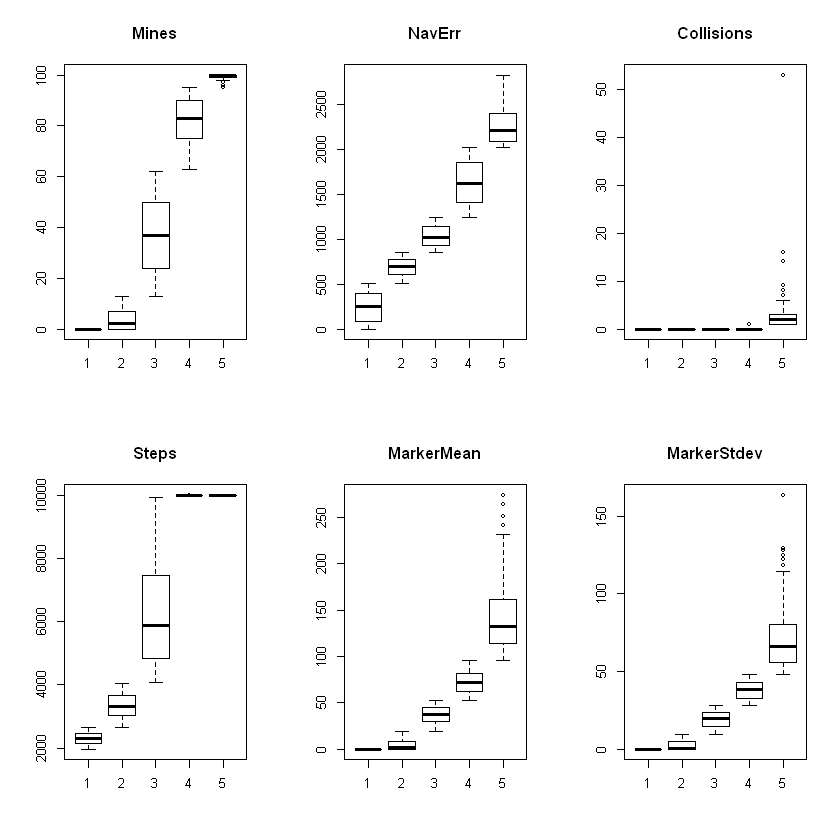

In [2]:
library('dplyr')

# split the run results into quintiles by measure of performance
data.verify %>% mutate(
    mine.quintile = ntile(data.verify$count.mine.contacts, 5),
    step.quintile = ntile(data.verify$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.verify.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.baseline.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.baseline.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.baseline.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.baseline.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.baseline.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.baseline.quintiles, main='MarkerStdev')

We check if the vulnerability results are similar by computing the correlation matrix of the dataset.

Warning message:
"package 'Hmisc' was built under R version 3.5.2"Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.5.2"Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Warning message:
"package 'corrplot' was built under R version 3.5.2"corrplot 0.84 loaded


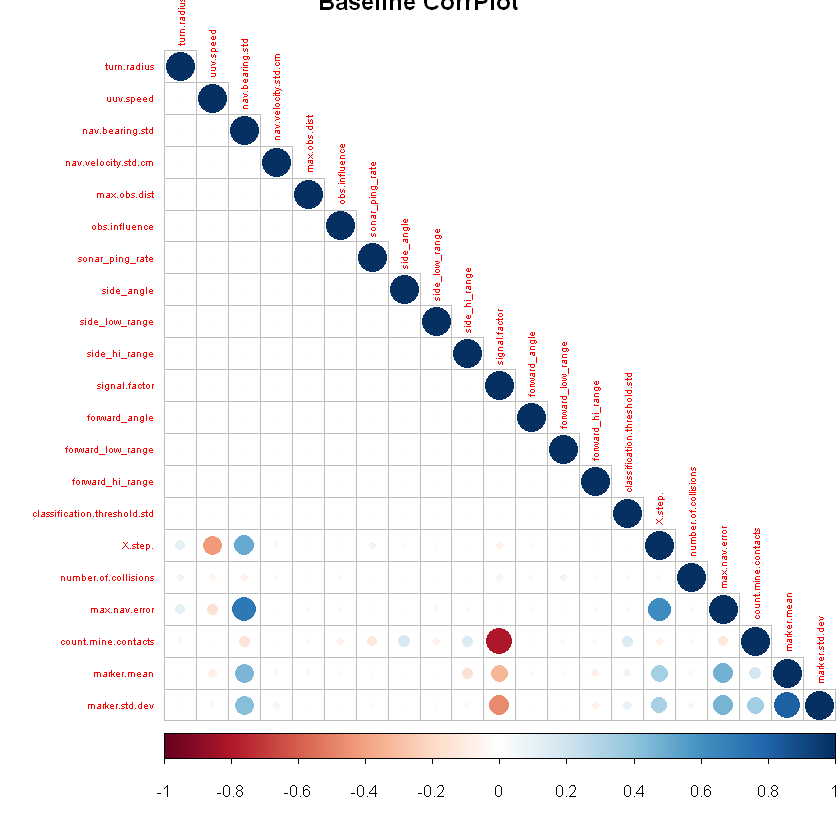

In [3]:
library(Hmisc)
library(corrplot)

cor.baseline <- rcorr(as.matrix(data.baseline[c(2:16,18:23)]))

corrplot(cor.baseline$r, main="Baseline CorrPlot", type="lower", tl.cex=0.5)

The repeat of the vulnerability study lines up with the original study, so we can be confident that this model will provide valid results.

In [39]:
# load datafiles
doe.baseline <- read.csv("./baseline_NOLH_description.csv", header = TRUE)  # NOLH experiment design
results.baseline <- read.csv("./baseline/baseline threat run randomized-table.csv", skip=6, header=TRUE)

# format column names
colnames(doe.baseline)[1] <- "experiment.number"

# build the dataset
data.baseline <- merge(doe.baseline, results.baseline, "experiment.number")

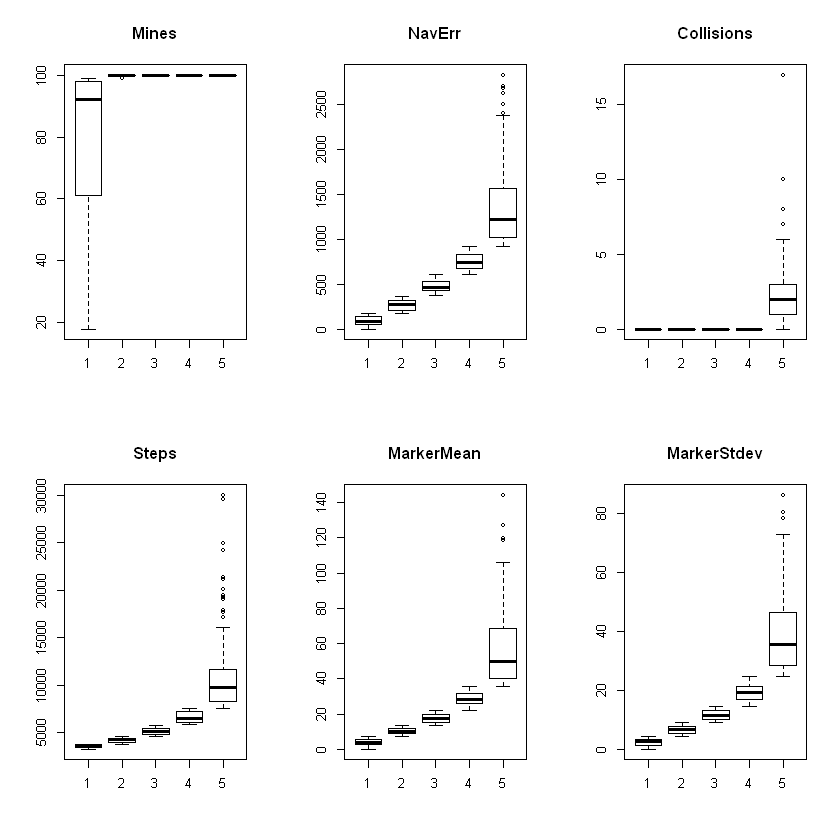

In [40]:
# split the run results into quintiles by measure of performance
data.baseline %>% mutate(
    mine.quintile = ntile(data.baseline$count.mine.contacts, 5),
    step.quintile = ntile(data.baseline$X.step, 5),
    nav.error.quintile = ntile(max.nav.error, 5),
    marker.mean.quintile = ntile(marker.mean, 5),
    marker.std.quintile = ntile(marker.std.dev, 5),
    collisions.quintile = ntile(number.of.collisions, 5)
) -> data.baseline.quintiles

# plot the quintile distributions of the baseline
layout(matrix(c(1,2,3,4,5,6),2,3))
boxplot(count.mine.contacts~mine.quintile, data=data.baseline.quintiles, main='Mines')
boxplot(X.step.~step.quintile, data=data.baseline.quintiles, main='Steps')
boxplot(max.nav.error~nav.error.quintile, data=data.baseline.quintiles, main='NavErr')
boxplot(marker.mean~marker.mean.quintile, data=data.baseline.quintiles, main='MarkerMean')
boxplot(number.of.collisions~collisions.quintile, data=data.baseline.quintiles, main='Collisions')
boxplot(marker.std.dev~marker.std.quintile, data=data.baseline.quintiles, main='MarkerStdev')